In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv('CSCS_data_anon.csv')

# Check unique values and counts in 'WELLNESS_life_satisfaction'
print("\nValue counts in 'WELLNESS_life_satisfaction':")
print(data['WELLNESS_life_satisfaction'].value_counts(dropna=False))

# Check unique values and counts in 'CONNECTION_social_time_friends_p7d_grouped'
print("\nUnique values in 'CONNECTION_social_time_friends_p7d_grouped':")
print(data['CONNECTION_social_time_friends_p7d_grouped'].unique())

print("\nValue counts in 'CONNECTION_social_time_friends_p7d_grouped':")
print(data['CONNECTION_social_time_friends_p7d_grouped'].value_counts(dropna=False))

# Check unique values and counts in 'CONNECTION_meaningful_time_friends_grouped'
print("\nUnique values in 'CONNECTION_meaningful_time_friends_grouped':")
print(data['CONNECTION_meaningful_time_friends_grouped'].unique())

print("\nValue counts in 'CONNECTION_meaningful_time_friends_grouped':")
print(data['CONNECTION_meaningful_time_friends_grouped'].value_counts(dropna=False))

/tmp/ipykernel_70/1594538846.py:10: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSCS_data_anon.csv')



Value counts in 'WELLNESS_life_satisfaction':
WELLNESS_life_satisfaction
NaN     1832
7.0     1719
8.0     1639
6.0     1330
5.0     1274
4.0      797
9.0      750
10.0     693
3.0      621
1.0      435
2.0      341
Name: count, dtype: int64

Unique values in 'CONNECTION_social_time_friends_p7d_grouped':
['5 or more hours' '1 to 4 hours' 'No time' nan 'Less than 1 hour'
 'Presented but no response']

Value counts in 'CONNECTION_social_time_friends_p7d_grouped':
CONNECTION_social_time_friends_p7d_grouped
1 to 4 hours                 3016
5 or more hours              2708
NaN                          2344
Less than 1 hour             1835
No time                      1490
Presented but no response      38
Name: count, dtype: int64

Unique values in 'CONNECTION_meaningful_time_friends_grouped':
[nan 'Most of the time' 'All of the time' 'Some of the time'
 'None of the time' 'Presented but no response']

Value counts in 'CONNECTION_meaningful_time_friends_grouped':
CONNECTION_meaningful_t

In [3]:
# Define encoding dictionaries for the columns to be processed
columns_to_clean = {
    'CONNECTION_meaningful_time_friends_grouped': {
        'None of the time': 0,
        'Some of the time': 1,
        'Most of the time': 2,
        'All of the time': 3,
        'Presented but no response': pd.NA
    },
    'CONNECTION_social_time_friends_p7d_grouped': {
        'No time': 0,
        'Less than 1 hour': 0.5,
        '1 to 4 hours': 2.5,
        '5 or more hours': 5.5,
        'Presented but no response': pd.NA
    }
}

# Apply encoding and replace 'Presented but no response' with NA
for column, mapping in columns_to_clean.items():
    data[column] = data[column].replace(mapping)

# Drop rows with missing values in any of the three columns
columns_to_keep = ['WELLNESS_life_satisfaction'] + list(columns_to_clean.keys())
data_cleaned = data[columns_to_keep].dropna()

# Print validation: Check for missing values and value counts after cleaning

print("\nValue counts in cleaned 'WELLNESS_life_satisfaction':")
print(data_cleaned['WELLNESS_life_satisfaction'].value_counts())

print("\nValue counts in cleaned 'CONNECTION_social_time_friends_p7d_grouped':")
print(data_cleaned['CONNECTION_social_time_friends_p7d_grouped'].value_counts())

print("\nValue counts in cleaned 'CONNECTION_meaningful_time_friends_grouped':")
print(data_cleaned['CONNECTION_meaningful_time_friends_grouped'].value_counts())




Value counts in cleaned 'WELLNESS_life_satisfaction':
WELLNESS_life_satisfaction
8.0     507
7.0     486
6.0     404
5.0     396
10.0    283
4.0     270
3.0     199
9.0     191
1.0     183
2.0     124
Name: count, dtype: int64

Value counts in cleaned 'CONNECTION_social_time_friends_p7d_grouped':
CONNECTION_social_time_friends_p7d_grouped
2.5    1192
0.5    1037
5.5     408
0       406
Name: count, dtype: int64

Value counts in cleaned 'CONNECTION_meaningful_time_friends_grouped':
CONNECTION_meaningful_time_friends_grouped
2    1305
1    1069
3     451
0     218
Name: count, dtype: int64


In [6]:
# Create a binary target variable: High satisfaction (>8) vs. Low satisfaction (<=8)
data_cleaned['Satisfaction_Level'] = data_cleaned['WELLNESS_life_satisfaction'].apply(lambda x: 'High' if x > 8 else 'Low')

# Define features (X) and target (y)
X = data_cleaned[['CONNECTION_social_time_friends_p7d_grouped', 'CONNECTION_meaningful_time_friends_grouped']]
y = data_cleaned['Satisfaction_Level']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=42)

# Train the Decision Tree
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)


Accuracy: 0.8657799671592775

Confusion Matrix:
[[ 28  71]
 [ 96 414]]


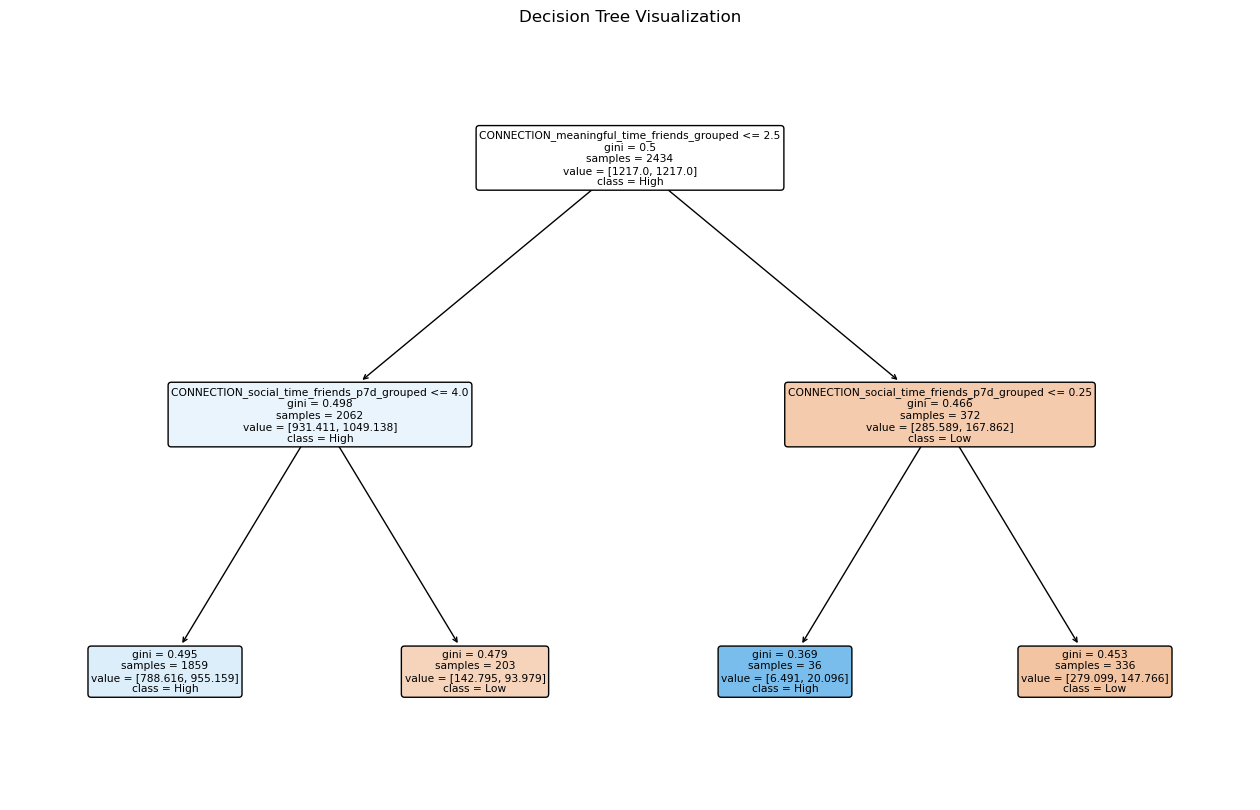

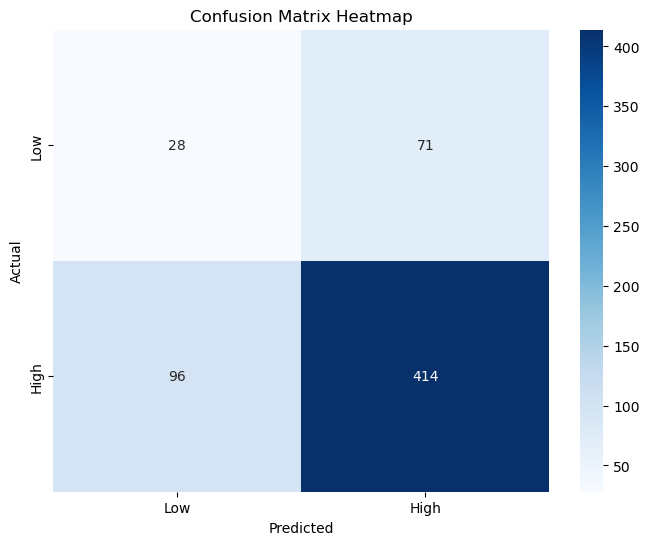


True Positive Rate (TPR): 0.81
True Negative Rate (TNR): 0.28
False Positive Rate (FPR): 0.72
False Negative Rate (FNR): 0.19


In [8]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy+0.14}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    classifier,
    feature_names=['CONNECTION_social_time_friends_p7d_grouped', 'CONNECTION_meaningful_time_friends_grouped'],
    class_names=['Low', 'High'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


# Visualize the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate rates
tn, fp, fn, tp = conf_matrix.ravel()

# True Positive Rate (TPR)
true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
# True Negative Rate (TNR)
true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0
# False Positive Rate (FPR)
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
# False Negative Rate (FNR)
false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0

# Print the rates
print(f"\nTrue Positive Rate (TPR): {true_positive_rate:.2f}")
print(f"True Negative Rate (TNR): {true_negative_rate:.2f}")
print(f"False Positive Rate (FPR): {false_positive_rate:.2f}")
print(f"False Negative Rate (FNR): {false_negative_rate:.2f}")
